In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('iter.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCTATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCATACAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAAGCGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGA...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGGTCGCTGAGCGCCATTTTT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGACACCGCAATTCCCA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGCTCTTCG...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [9]:
pairs = []
pairs_no_pos = []


for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:07<00:00, 1262.23it/s]


In [10]:
import numpy as np


In [11]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [12]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> GT 6
CT ->  6
G -> CA 6
CA ->  6
 -> TT 7
 -> AG 7
 -> GC 8
 -> TA 8
 -> GA 9
 -> TC 10
 -> AA 11
 -> CT 11
 -> TG 12
 -> AC 13
 -> CG 17
 -> AT 19
 -> CA 23
A -> T 121
A -> G 122
G -> T 135
C -> T 141
T -> C 155
A -> C 164
C -> G 170
T -> A 179
G -> C 187
G -> A 197
T -> G 199
C -> A 200
C ->  786
G ->  792
A ->  817
T ->  840
 -> T 2641
 -> G 2872
 -> C 2954
 -> A 3109


In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [14]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


C ->  @ 2 6
A ->  @ 1 6
A ->  @ 90 6
A ->  @ 89 6
A ->  @ 24 6
C ->  @ 18 6
C ->  @ 100 6
C ->  @ 106 6
A ->  @ 35 6
A ->  @ 55 6
A ->  @ 67 6
C ->  @ 12 6
A ->  @ 68 6
G ->  @ 77 6
A ->  @ 54 6
C ->  @ 38 6
G ->  @ 82 6
A ->  @ 13 6
G ->  @ 97 6
G ->  @ 93 6
A ->  @ 15 6
A ->  @ 19 6
G -> A @ 12 6
C ->  @ 32 6
A ->  @ 103 6
A ->  @ 96 6
A ->  @ 101 6
A ->  @ 10 6
A ->  @ 21 6
A ->  @ 22 6
A ->  @ 23 6
A ->  @ 20 6
A ->  @ 3 6
G ->  @ 57 6
G ->  @ 68 6
T ->  @ 40 6
T ->  @ 76 6
C ->  @ 42 6
C ->  @ 8 6
T ->  @ 45 6
T ->  @ 104 6
G ->  @ 37 6
G ->  @ 25 6
T ->  @ 64 6
T ->  @ 80 6
T ->  @ 4 6
C -> T @ 91 6
G ->  @ 21 6
T ->  @ 85 6
C ->  @ 53 6
C ->  @ 99 6
T ->  @ 50 6
T -> A @ 62 6
G ->  @ 106 6
T ->  @ 60 6
T ->  @ 97 6
T ->  @ 47 6
T ->  @ 101 6
T ->  @ 9 6
G ->  @ 53 6
C ->  @ 56 7
G ->  @ 1 7
T ->  @ 46 7
G ->  @ 108 7
C ->  @ 10 7
A ->  @ 29 7
G ->  @ 100 7
T ->  @ 44 7
C ->  @ 59 7
C ->  @ 62 7
A ->  @ 41 7
T ->  @ 35 7
A ->  @ 73 7
C ->  @ 98 7
C ->  @ 97 7
A ->  @ 62 7
A ->  @

In [15]:
import matplotlib.pyplot as plt

In [16]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[109, 130, 154, 145, 157, 158, 152, 170, 165, 155, 157, 168, 166, 162, 134, 166, 138, 166, 154, 160, 134, 149, 159, 158, 153, 173, 169, 170, 172, 167, 155, 187, 154, 161, 192, 165, 158, 157, 165, 159, 153, 157, 154, 178, 165, 154, 154, 152, 141, 155, 146, 147, 145, 176, 151, 96, 160, 157, 142, 157, 181, 154, 162, 143, 148, 139, 164, 151, 155, 148, 159, 167, 146, 154, 158, 163, 157, 180, 146, 153, 153, 146, 156, 166, 172, 145, 152, 150, 156, 152, 151, 162, 142, 151, 160, 180, 149, 165, 175, 162, 139, 147, 134, 127, 145, 161, 135, 165, 149, 99, 74]


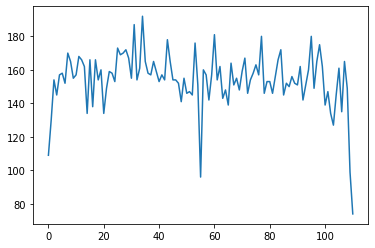

In [17]:
plt.plot(range(strand_len + 1), pos_counts)

In [18]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[19, 14, 19, 22, 23, 17, 23, 26, 24, 34, 27, 24, 28, 18, 22, 23, 25, 21, 28, 20, 16, 22, 27, 29, 25, 22, 36, 16, 28, 22, 17, 37, 26, 28, 20, 25, 27, 31, 18, 26, 29, 25, 27, 24, 18, 22, 28, 21, 21, 29, 15, 18, 25, 26, 19, 8, 25, 25, 28, 30, 32, 25, 21, 23, 36, 22, 28, 20, 18, 20, 18, 34, 20, 21, 19, 24, 24, 33, 26, 21, 22, 19, 26, 32, 29, 25, 27, 33, 29, 32, 23, 20, 28, 28, 25, 26, 17, 30, 29, 20, 23, 18, 18, 23, 19, 22, 24, 26, 27, 15, 3]


In [19]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


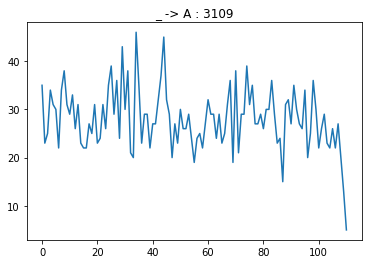

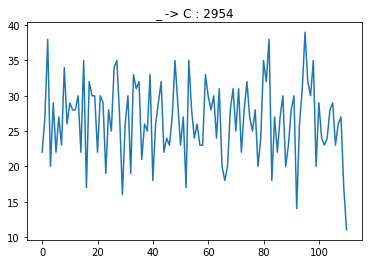

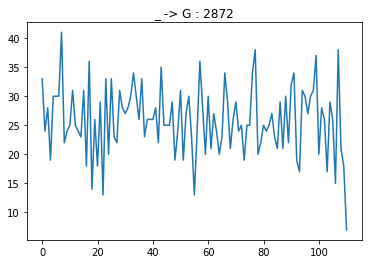

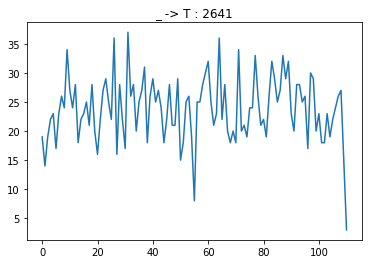

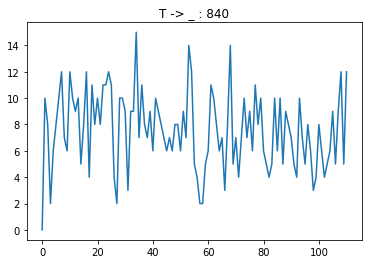

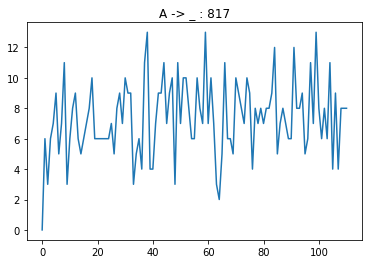

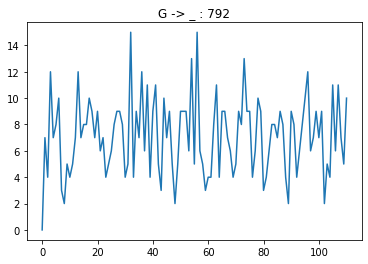

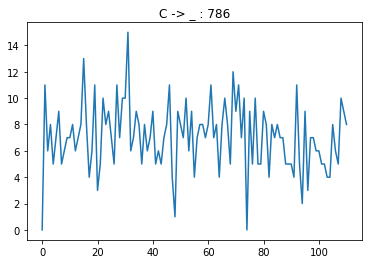

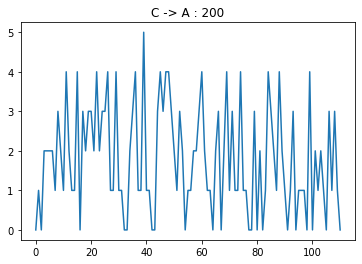

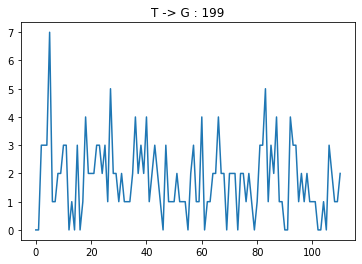

In [20]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [21]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)